In [ ]:
# Titanic Data Analysis and Machine Learning Project
#This project involves exploratory data analysis and machine learning on the Titanic dataset to predict passenger survival.

In [19]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [ ]:
# Data Cleaning

In [20]:
# Check for missing values
df.isnull().sum()

# Fill missing values in 'Age' with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing values in 'Embarked' with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify that there are no more missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Data Analysis and Visualization

In [21]:
# Set the style of the visualization
sns.set(style="whitegrid")

In [ ]:
# Analyze survival rates by gender

In [22]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

Sex
Male      0.188908
female    0.740385
Name: Survived, dtype: float64


In [ ]:
# Visualize survival rates by gender

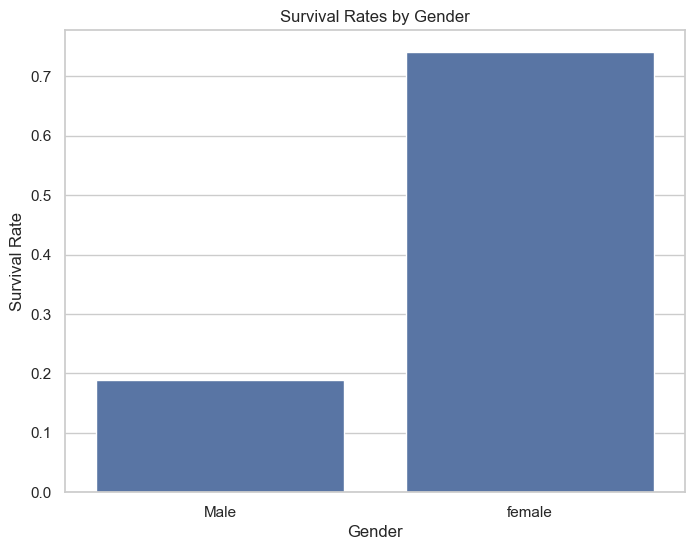

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
# Analyze survival rates by class

In [24]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
# Visualize survival rates by class

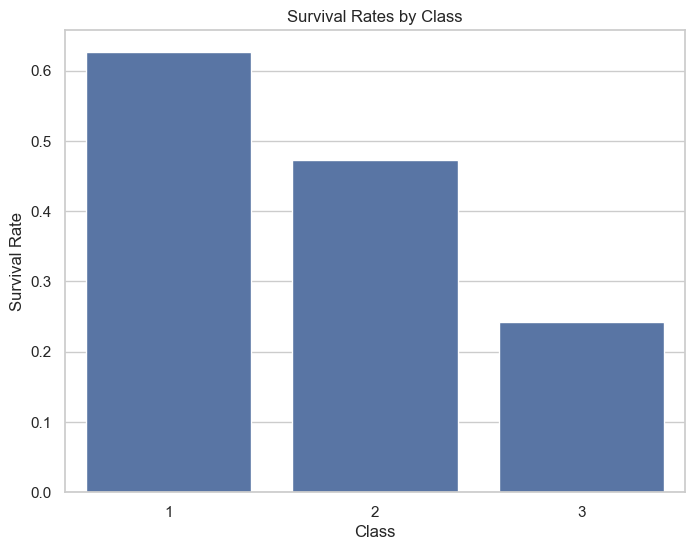

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rates by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
# Visualize the age distribution of survivors and non-survivors

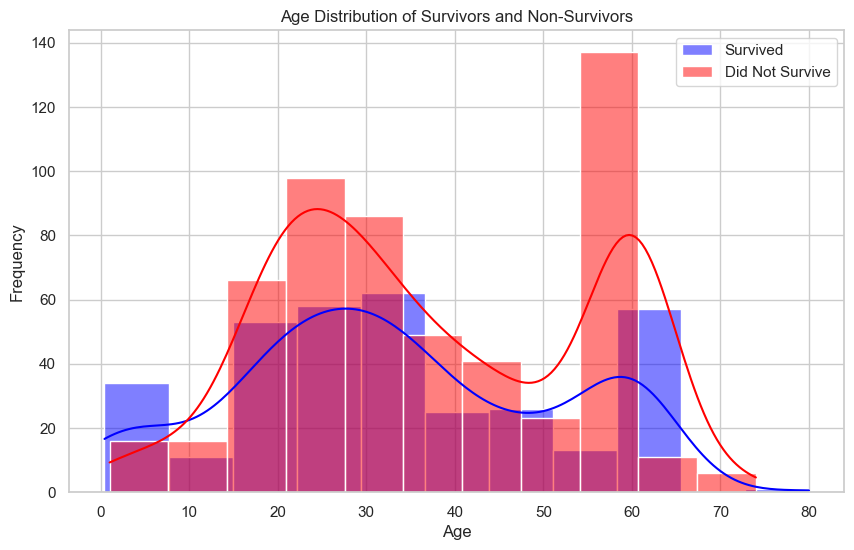

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], label='Survived', color='blue', kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', color='red', kde=True)
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Model Building

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print(df.columns)
# Select features and target variable
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_2', 'Embarked_3']
X = df[features]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Embarked_2', 'Embarked_3'],
      dtype='object')
Accuracy: 0.7696629213483146
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       109
           1       0.68      0.75      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178

